# New Section

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:

IMAGE_SIZE = 224
pretrained_model = tf.keras.applications.NASNetMobile(input_shape=(224,224, 3), include_top=False)
pretrained_model.trainable = False

model = tf.keras.Sequential([
            pretrained_model,
    tf.keras.layers.Dropout(.4),
           tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = "relu"),
            
            tf.keras.layers.Dense(2, activation = "softmax")
])

2021-12-05 22:38:23.073934: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-05 22:38:23.074058: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-05 22:38:23.077549: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
# Train from scratch
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

Using TensorFlow backend.


In [5]:
train_generator = train_datagen.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')


Found 5216 images belonging to 2 classes.


In [6]:
validation_generator = test_dataset.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

Found 624 images belonging to 2 classes.


In [7]:
hist = model.fit(train_generator,steps_per_epoch=50 ,epochs=10, validation_data=validation_generator) 


2021-12-05 22:38:27.111250: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-05 22:38:27.111982: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3800135000 Hz


Epoch 1/10
50/50 [==============================] - 83s 2s/step - loss: 9.0949 - accuracy: 0.5456 - val_loss: 0.6901 - val_accuracy: 0.6250
Epoch 2/10
50/50 [==============================] - 75s 1s/step - loss: 0.6827 - accuracy: 0.7377 - val_loss: 0.6813 - val_accuracy: 0.6250
Epoch 3/10
50/50 [==============================] - 78s 2s/step - loss: 0.6644 - accuracy: 0.7467 - val_loss: 0.6744 - val_accuracy: 0.6250
Epoch 4/10
50/50 [==============================] - 79s 2s/step - loss: 0.6429 - accuracy: 0.7711 - val_loss: 0.6685 - val_accuracy: 0.6250
Epoch 5/10
50/50 [==============================] - 80s 2s/step - loss: 0.6374 - accuracy: 0.7291 - val_loss: 0.6650 - val_accuracy: 0.6250
Epoch 6/10
50/50 [==============================] - 80s 2s/step - loss: 0.6208 - accuracy: 0.7467 - val_loss: 0.6628 - val_accuracy: 0.6250
Epoch 7/10
50/50 [==============================] - 81s 2s/step - loss: 0.6247 - accuracy: 0.7140 - val_loss: 0.6618 - val_accuracy: 0.6250
Epoch 8/10
50/50 [==

**Model Image**

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='xray-resnet50.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


**Model Summary**

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 7, 7, 1056)        4269716   
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 1056)        0         
_________________________________________________________________
flatten (Flatten)            (None, 51744)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6623360   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 10,893,334
Trainable params: 6,623,618
Non-trainable params: 4,269,716
_________________________________________________________________


**Accuracy and Loss Graph**

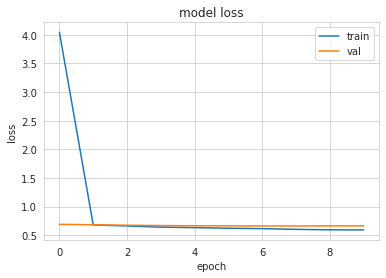

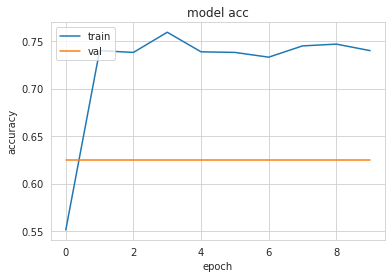

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
history = hist
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
#plt.xlim(1, 21)
#plt.ylim(0, 1)
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.xlim(1, 21)
#plt.ylim(0, 1)
plt.show()

**Confusion Matrix**

In [11]:

# Look at confusion matrix 
import itertools
plt.rcParams['figure.figsize'] = (5, 5)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=100)


#plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = ['Normal','Pneumonia'])

**Confusion Matrix accuray precission of_validation**

[[  0 234]
 [  0 390]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



/s/chopin/l/grad/mbanik/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


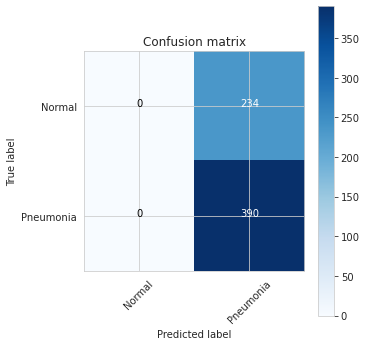

In [12]:
from sklearn.metrics import confusion_matrix
import numpy
pred= model.predict(validation_generator)
#print("pred")
#print(pred)
pred = np.argmax(pred,axis=1)
#print("np.argmax")
#print(pred)
true_classes = validation_generator.classes
#print(test_generator.filenames)
#print("true classes")
#print(true_classes)
cf = confusion_matrix(true_classes,pred)
print(cf)
plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = ['Normal','Pneumonia'])
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 

**Confusion accuracy of test gen**

Found 16 images belonging to 2 classes.
[[0 8]
 [0 8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.50      1.00      0.67         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



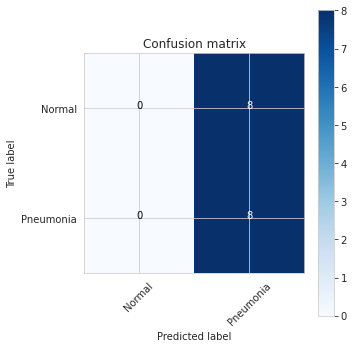

In [13]:
test_generator = test_dataset.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)
from sklearn.metrics import confusion_matrix
import numpy
pred= model.predict(test_generator)
#print("pred")
#print(pred)
pred = np.argmax(pred,axis=1)
#print("np.argmax")
#print(pred)
true_classes = test_generator.classes
#print(test_generator.filenames)
#print("true classes")
#print(true_classes)
cf = confusion_matrix(true_classes,pred)
print(cf)
plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = ['Normal','Pneumonia'])
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 